/var/folders/j6/_f4gqc7j33nb2dzqnzm9w2w00000gn/T/ipykernel_60346/3157981711.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dataset", y="IC50", data=df_all, palette="Set2")


ValueError: cannot reindex on an axis with duplicate labels

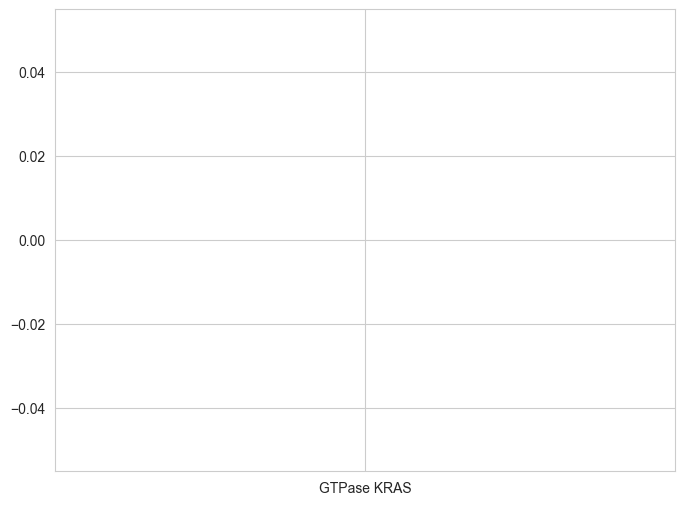

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load each dataset
df_kras = pd.read_csv("/Users/user/Downloads/Drug Design FInal/FINAL_GIT/Raw Files/merged_features_IC50_gtpase_kras.csv")
df_g12c = pd.read_csv("/Users/user/Downloads/Drug Design FInal/FINAL_GIT/Raw Files/new_merged_features_IC50_g12c.csv")
df_g12d = pd.read_csv("/Users/user/Downloads/Drug Design FInal/FINAL_GIT/Raw Files/merged_features_IC50_g12d.csv")

# Standardize column names
df_kras["IC50"] = df_kras['Standard Value']
df_g12c["IC50"] = df_g12c['IC50 (nM)']
df_g12d["IC50"] = df_g12d['IC50 (nM)']

# Add a 'Dataset' column to each dataset
df_kras["Dataset"] = "GTPase KRAS"
df_g12c["Dataset"] = "G12C"
df_g12d["Dataset"] = "G12D"

# Concatenate all datasets into one DataFrame
df_all = pd.concat([df_kras[['IC50', 'Dataset']], df_g12c[['IC50', 'Dataset']], df_g12d[['IC50', 'Dataset']]])

df_all['IC50'] = df_all['IC50'].str.lstrip('<>').astype(float)


# Box plot: Compare IC50 distributions across datasets
plt.figure(figsize=(8, 6))
sns.boxplot(x="Dataset", y="IC50", data=df_all, palette="Set2")
plt.xlabel("Dataset")
plt.ylabel("IC50 (nM)")
plt.title("Distribution of IC50 Values Across Datasets")
plt.show()

# Violin plot: Show data density per dataset
plt.figure(figsize=(8, 6))
sns.violinplot(x="Dataset", y="IC50", data=df_all, palette="Set2", inner="box")
plt.xlabel("Dataset")
plt.ylabel("IC50 (nM)")
plt.title("Violin Plot of IC50 Values Across Datasets")
plt.show()

# Histogram: Faceted view of IC50 distributions per dataset
g = sns.FacetGrid(df_all, col="Dataset", height=4, aspect=1.2)
g.map(sns.histplot, "IC50", bins=15, kde=True, color="steelblue", alpha=0.6)
g.set_axis_labels("IC50 (nM)", "Frequency")
g.set_titles(col_template="{col_name} Dataset")
plt.show()


GTPase KRAS: 15.96% of data has IC50 <= 10 nM
G12C: 6.74% of data has IC50 <= 10 nM
G12D: 51.27% of data has IC50 <= 10 nM


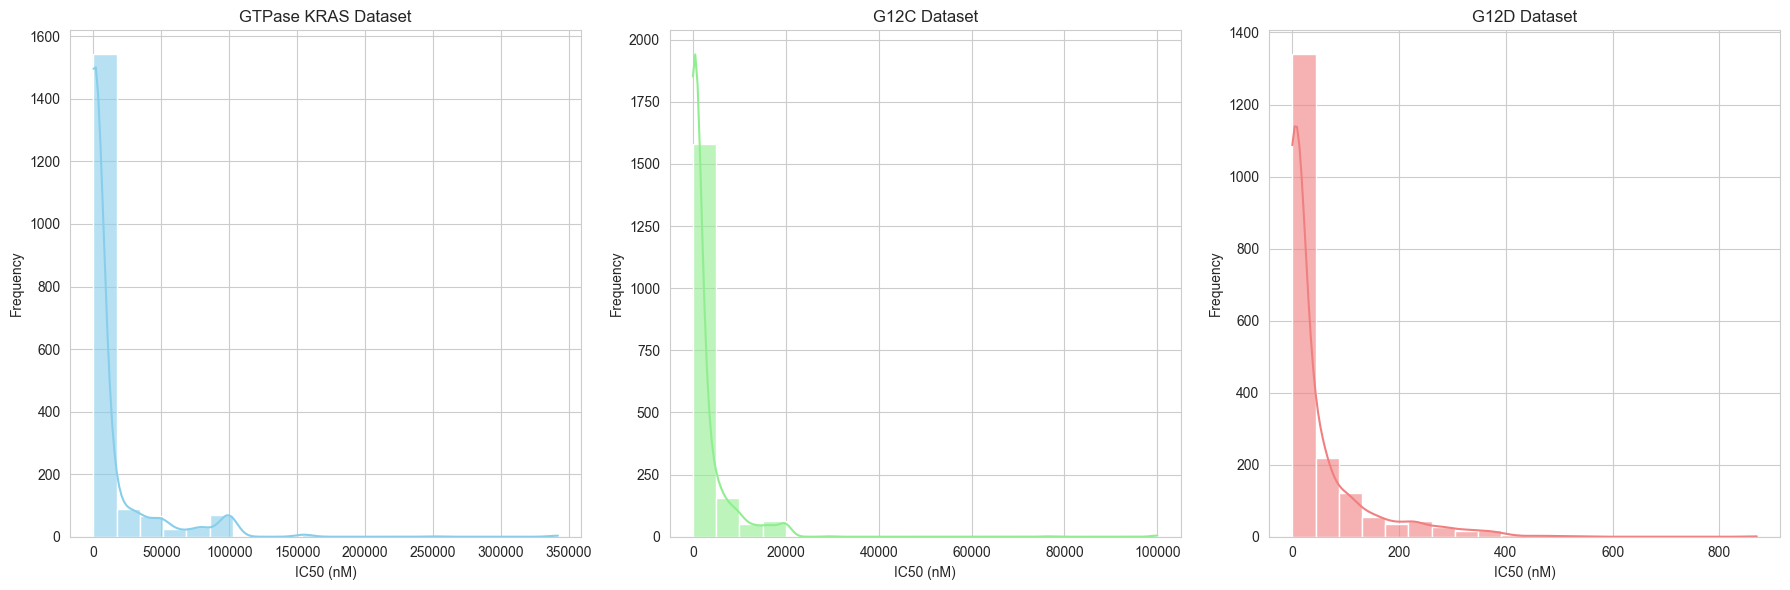

GTPase KRAS: 15.96% of data has IC50 <= 10 nM
G12C: 6.74% of data has IC50 <= 10 nM
G12D: 51.27% of data has IC50 <= 10 nM


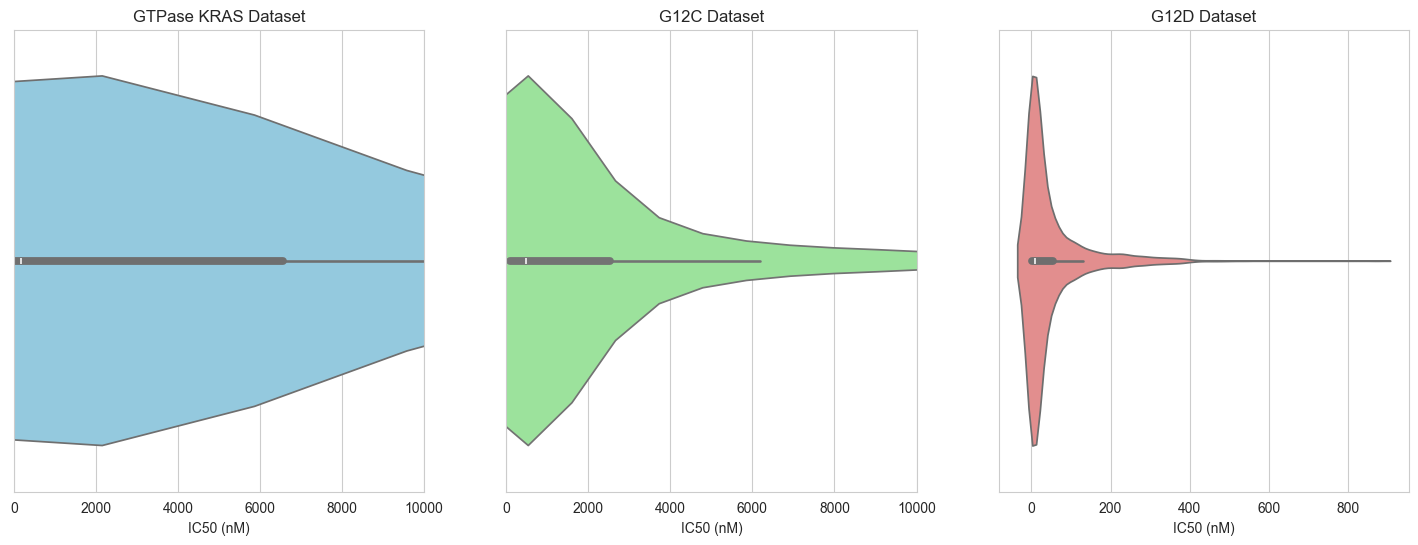

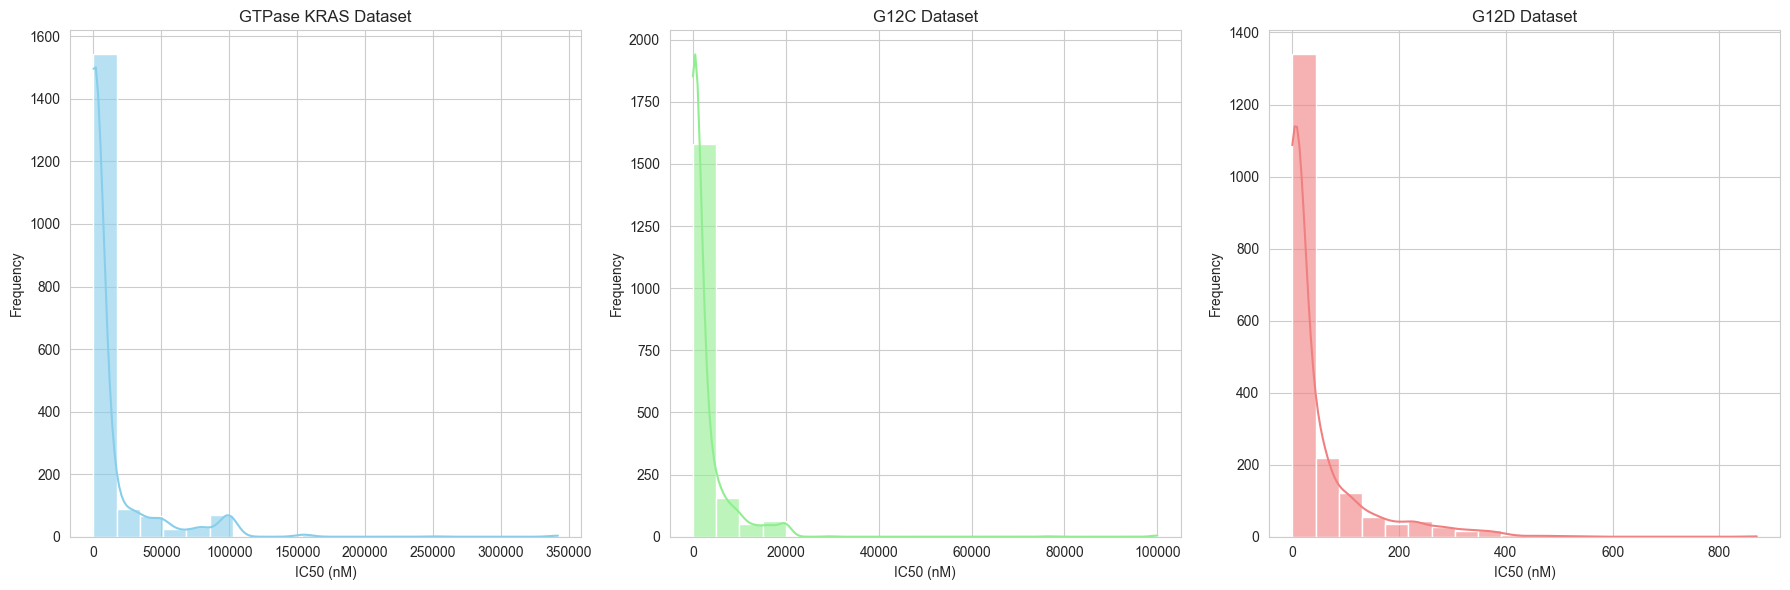

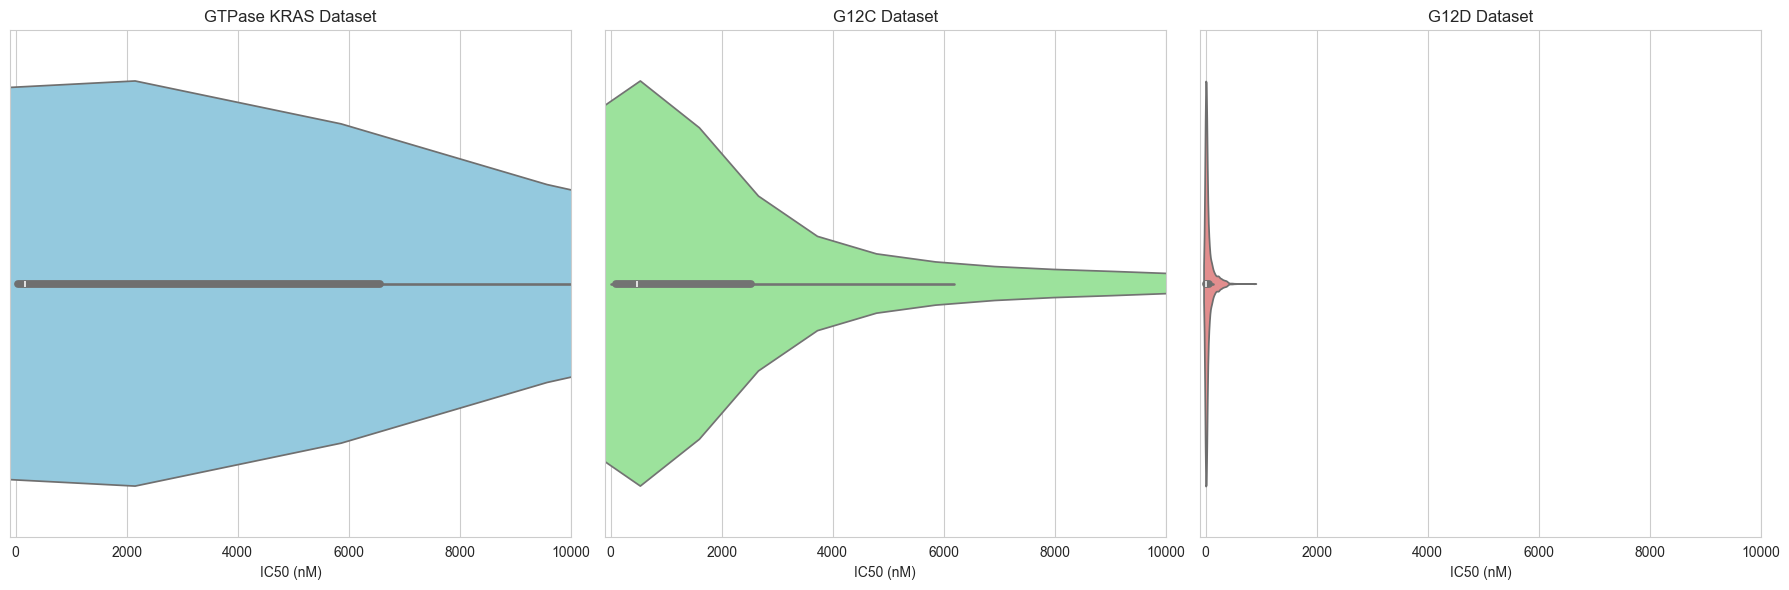

<Figure size 640x480 with 0 Axes>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load each dataset
df_kras = pd.read_csv("C:\\Users\TheSh\Documents\Programming_in_Python_Class\PyCharmProjects\ML_for_KRAS_G12D_Inhibitors\Raw Files\merged_features_IC50_gtpase_kras.csv")
df_g12c = pd.read_csv("C:\\Users\TheSh\Documents\Programming_in_Python_Class\PyCharmProjects\ML_for_KRAS_G12D_Inhibitors\Raw Files\\new_merged_features_IC50_g12c.csv")
df_g12d = pd.read_csv("C:\\Users\TheSh\Documents\Programming_in_Python_Class\PyCharmProjects\ML_for_KRAS_G12D_Inhibitors\Raw Files\\new_merged_features_IC50_g12d.csv")
df_g12d_og = pd.read_csv("C:\\Users\TheSh\Documents\Programming_in_Python_Class\PyCharmProjects\ML_for_KRAS_G12D_Inhibitors\Raw Files\G12D.tsv", sep='\t')
df_g12d_hyb = pd.read_csv("C:\\Users\TheSh\Documents\Programming_in_Python_Class\PyCharmProjects\ML_for_KRAS_G12D_Inhibitors\Raw Files\G12D_Hyb_Features.csv")

# Standardize column names
df_kras["IC50"] = df_kras['Standard Value']  # Assuming 'Standard Value' contains IC50 data in this dataset
df_g12c["IC50"] = df_g12c['IC50 (nM)']  # This column seems to be the IC50 for the G12C dataset
df_g12d["IC50"] = df_g12d['IC50 (nM)']  # Same for G12D dataset

# Ensure the 'IC50' columns are of string type before applying .str methods
df_kras["IC50"] = df_kras["IC50"].astype(str).str.lstrip('<>').astype(float)
df_g12c["IC50"] = df_g12c["IC50"].astype(str).str.lstrip('<>').astype(float)
df_g12d["IC50"] = df_g12d["IC50"].astype(str).str.lstrip('<>').astype(float)

# Add a 'Dataset' column to each dataset
df_kras["Dataset"] = "GTPase KRAS"
df_g12c["Dataset"] = "G12C"
df_g12d["Dataset"] = "G12D"

# Concatenate all datasets into one DataFrame for shared visualization
df_all = pd.concat([df_kras[['IC50', 'Dataset']], df_g12c[['IC50', 'Dataset']], df_g12d[['IC50', 'Dataset']]])

# Calculate and print the percentage of IC50 values <= 10,000 for each dataset
threshold = 10

def calc_percent_below_threshold(df, label):
    total = len(df)
    below_threshold = (df['IC50'] <= threshold).sum()
    percent = (below_threshold / total) * 100
    print(f"{label}: {percent:.2f}% of data has IC50 <= {threshold} nM")

calc_percent_below_threshold(df_kras, "GTPase KRAS")
calc_percent_below_threshold(df_g12c, "G12C")
calc_percent_below_threshold(df_g12d, "G12D")


# 1. **Individual Histograms for Each Dataset:**
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# GTPase KRAS
sns.histplot(df_kras['IC50'], bins=20, kde=True, ax=axes[0], color="skyblue", alpha=0.6)
axes[0].set_title("GTPase KRAS Dataset")
axes[0].set_xlabel("IC50 (nM)")
axes[0].set_ylabel("Frequency")

# G12C
sns.histplot(df_g12c['IC50'], bins=20, kde=True, ax=axes[1], color="lightgreen", alpha=0.6)
axes[1].set_title("G12C Dataset")
axes[1].set_xlabel("IC50 (nM)")
axes[1].set_ylabel("Frequency")

# G12D
sns.histplot(df_g12d['IC50'], bins=20, kde=True, ax=axes[2], color="lightcoral", alpha=0.6)
axes[2].set_title("G12D Dataset")
axes[2].set_xlabel("IC50 (nM)")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# 2. **Violin Plots for Each Dataset:**
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# GTPase KRAS
sns.violinplot(x=df_kras['IC50'], ax=axes[0], color="skyblue")
axes[0].set_title("GTPase KRAS Dataset")
axes[0].set_xlabel("IC50 (nM)")
axes[0].set_xlim([0,10000])

# G12C
sns.violinplot(x=df_g12c['IC50'], ax=axes[1], color="lightgreen")
axes[1].set_title("G12C Dataset")
axes[1].set_xlabel("IC50 (nM)")
axes[1].set_xlim([0,10000])

# G12D
sns.violinplot(x=df_g12d['IC50'], ax=axes[2], color="lightcoral")
axes[2].set_title("G12D Dataset")
axes[2].set_xlabel("IC50 (nM)")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load each dataset
df_kras = pd.read_csv(
    "C:\\Users\TheSh\Documents\Programming_in_Python_Class\PyCharmProjects\ML_for_KRAS_G12D_Inhibitors\Raw Files\merged_features_IC50_gtpase_kras.csv")
df_g12c = pd.read_csv(
    "C:\\Users\TheSh\Documents\Programming_in_Python_Class\PyCharmProjects\ML_for_KRAS_G12D_Inhibitors\Raw Files\\new_merged_features_IC50_g12c.csv")
df_g12d = pd.read_csv(
    "C:\\Users\TheSh\Documents\Programming_in_Python_Class\PyCharmProjects\ML_for_KRAS_G12D_Inhibitors\Raw Files\\new_merged_features_IC50_g12d.csv")
df_g12d_og = pd.read_csv(
    "C:\\Users\TheSh\Documents\Programming_in_Python_Class\PyCharmProjects\ML_for_KRAS_G12D_Inhibitors\Raw Files\G12D.tsv",
    sep='\t')
df_g12d_hyb = pd.read_csv(
    "C:\\Users\TheSh\Documents\Programming_in_Python_Class\PyCharmProjects\ML_for_KRAS_G12D_Inhibitors\Raw Files\G12D_Hyb_Features.csv")

# Standardize column names
df_kras["IC50"] = df_kras[
    'Standard Value']  # Assuming 'Standard Value' contains IC50 data in this dataset
df_g12c["IC50"] = df_g12c[
    'IC50 (nM)']  # This column seems to be the IC50 for the G12C dataset
df_g12d["IC50"] = df_g12d['IC50 (nM)']  # Same for G12D dataset

# Ensure the 'IC50' columns are of string type before applying .str methods
df_kras["IC50"] = df_kras["IC50"].astype(str).str.lstrip('<>').astype(
    float)
df_g12c["IC50"] = df_g12c["IC50"].astype(str).str.lstrip('<>').astype(
    float)
df_g12d["IC50"] = df_g12d["IC50"].astype(str).str.lstrip('<>').astype(
    float)

# Add a 'Dataset' column to each dataset
df_kras["Dataset"] = "GTPase KRAS"
df_g12c["Dataset"] = "G12C"
df_g12d["Dataset"] = "G12D"

# Concatenate all datasets into one DataFrame for shared visualization
df_all = pd.concat(
    [df_kras[['IC50', 'Dataset']], df_g12c[['IC50', 'Dataset']],
     df_g12d[['IC50', 'Dataset']]])

# Calculate and print the percentage of IC50 values <= 10,000 for each dataset
threshold = 10


def calc_percent_below_threshold(df, label):
    total = len(df)
    below_threshold = (df['IC50'] <= threshold).sum()
    percent = (below_threshold / total) * 100
    print(f"{label}: {percent:.2f}% of data has IC50 <= {threshold} nM")


calc_percent_below_threshold(df_kras, "GTPase KRAS")
calc_percent_below_threshold(df_g12c, "G12C")
calc_percent_below_threshold(df_g12d, "G12D")

# 1. **Individual Histograms for Each Dataset:**
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# GTPase KRAS
sns.histplot(df_kras['IC50'], bins=20, kde=True, ax=axes[0],
             color="skyblue", alpha=0.6)
axes[0].set_title("GTPase KRAS Dataset")
axes[0].set_xlabel("IC50 (nM)")
axes[0].set_ylabel("Frequency")

# G12C
sns.histplot(df_g12c['IC50'], bins=20, kde=True, ax=axes[1],
             color="lightgreen", alpha=0.6)
axes[1].set_title("G12C Dataset")
axes[1].set_xlabel("IC50 (nM)")
axes[1].set_ylabel("Frequency")

# G12D
sns.histplot(df_g12d['IC50'], bins=20, kde=True, ax=axes[2],
             color="lightcoral", alpha=0.6)
axes[2].set_title("G12D Dataset")
axes[2].set_xlabel("IC50 (nM)")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# 2. **Violin Plots for Each Dataset:**
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# GTPase KRAS
sns.violinplot(x=df_kras['IC50'], ax=axes[0], color="skyblue")
axes[0].set_title("GTPase KRAS Dataset")
axes[0].set_xlabel("IC50 (nM)")
axes[0].set_xlim([-100, 10000])

# G12C
sns.violinplot(x=df_g12c['IC50'], ax=axes[1], color="lightgreen")
axes[1].set_title("G12C Dataset")
axes[1].set_xlabel("IC50 (nM)")
axes[1].set_xlim([-100, 10000])

# G12D
sns.violinplot(x=df_g12d['IC50'], ax=axes[2], color="lightcoral")
axes[2].set_title("G12D Dataset")
axes[2].set_xlabel("IC50 (nM)")
axes[2].set_xlim([-100, 10000])

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [6]:
print(df_g12c["IC50"].max())
print(df_kras["IC50"].max())
print(df_g12d["IC50"].max())


100000.0
342000.0
870.0


In [8]:
print(len(df_g12c))
print(len(df_g12d))
print(len(df_kras))

1855
1886
1848


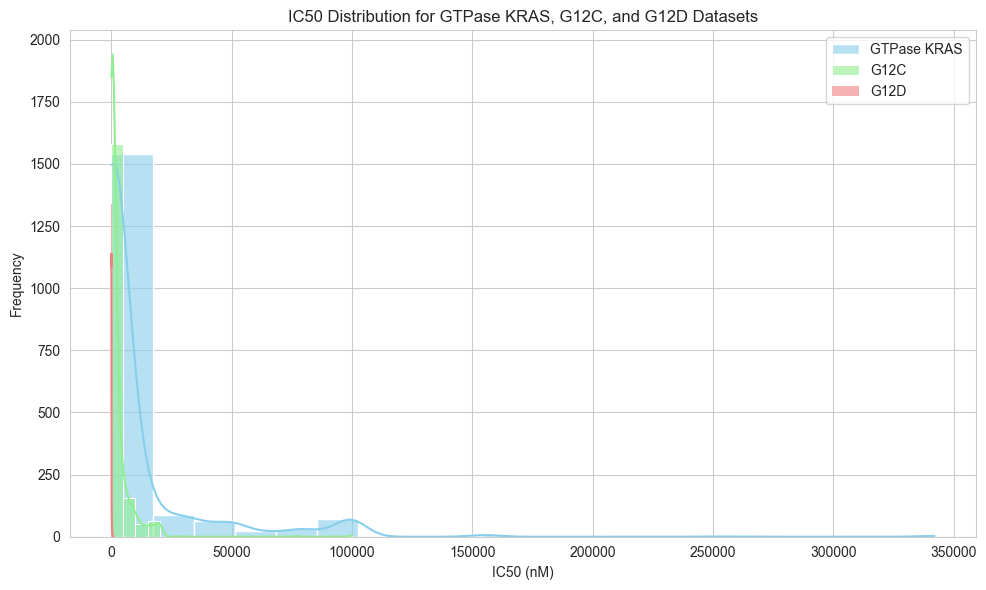

In [7]:


# Concatenate all datasets into one DataFrame for shared visualization
df_all = pd.concat([df_kras[['IC50', 'Dataset']], df_g12c[['IC50', 'Dataset']], df_g12d[['IC50', 'Dataset']]])

# 1. **Overlayed Histogram for All Datasets:**
plt.figure(figsize=(10, 6))

# Plot histograms for each dataset with different colors
sns.histplot(df_kras['IC50'], bins=20, kde=True, color="skyblue", alpha=0.6, label="GTPase KRAS")
sns.histplot(df_g12c['IC50'], bins=20, kde=True, color="lightgreen", alpha=0.6, label="G12C")
sns.histplot(df_g12d['IC50'], bins=20, kde=True, color="lightcoral", alpha=0.6, label="G12D")

# Add labels and title
plt.title("IC50 Distribution for GTPase KRAS, G12C, and G12D Datasets")
plt.xlabel("IC50 (nM)")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


